# chapter 2.7, animated plot exercise

In [1]:
import pandas as pd
import seaborn as sns
import pylab as plt

In [2]:
fert = pd.read_csv('/Users/maxkoeppel/SPICED/Week_1/data_week1/gapminder_total_fertility.csv', index_col=0)
fert.shape
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
life = pd.read_excel('/Users/maxkoeppel/SPICED/Week_1/data_week1/gapminder_lifeexpectancy.xlsx', sep =';', index_col=0)
life.shape

(260, 217)

In [4]:
pop = pd.read_excel('/Users/maxkoeppel/SPICED/Week_1/data_week1/gapminder_population.xlsx', index_col =0)
pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [5]:
cont = pd.read_csv('/Users/maxkoeppel/SPICED/Week_1/data_week1/continents.csv', sep=';')
cont.head(2)

,continent,country
0,Africa,Algeria
1,Africa,Angola


In [ ]:
life_cont=pd.merge(cont, life, right_on = ['Life expectancy'] , left_on = ['country'], how = 'inner').drop_duplicates()
life_cont.set_index('country', inplace = True)
life_cont.head()

In [ ]:
life.columns # check column classifier; in life it is an integer

In [6]:
fert.columns # check column classifier; in life it is an object, which should be converted to integer

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [7]:
ncol = [int(x) for x in fert.columns] # creates a list of integers from the column names of fert

In [8]:
fert.set_axis(axis=1, labels=ncol, inplace=True) # replace column-labels/axis in fert, by the integers list

In [ ]:
fert.columns

In [ ]:
pop.columns

In [10]:
sfert = fert.stack() # generates hierachical index, transforming dataframes to the ling format
slife = life.stack()
spop = pop.stack()
slife.shape

(43857,)

In [11]:
d = { 'fertility': sfert, 'lifeexp': slife, 'population': spop} # build dictionaries from the long table versions
df2 = pd.DataFrame(data=d) # generate dataframe from the dictionary
df2.head(2)

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21   3280000.0
            1801        7.0    28.20         NaN

In [12]:
df3 = df2.stack() # generating one super-long table, with several Indexes (MultiIndexed) dataframe
df3.head()

Afghanistan  1800  fertility           7.00
                   lifeexp            28.21
                   population    3280000.00
             1801  fertility           7.00
                   lifeexp            28.20
dtype: float64

In [ ]:
df4 = df3.unstack((0,2)) # convert table back to the wide format, with the index number 0 and 2 from df3 as column headers
df4.head()

In [ ]:
df4[['Germany', 'France', 'Sweden']].plot(figsize = (10,7)) # plotting all variables for three countries


In [ ]:
df4 = df3.unstack((2)) # convert table back to the wide format, with the index number 0 and 2 from df3 as column headers
df4b = df4[['fertility', 'lifeexp']]
df4b = df4b.stack()
df4b.unstack((0,2)).head()

In [ ]:
df4b[['Germany', 'France', 'Sweden']].plot(figsize = (10,7)) # plotting all variables for three countries

In [ ]:
df5 = df3.unstack(2) # produces a wide (somewhat wider) format with the second index as column headers
df5.head()


In [ ]:
df5.plot.scatter('fertility', 'lifeexp', s = 0.1) # correlates fertility with lifeexptency

In [16]:
df6 = df3.unstack(1) # produces a wide (somewhat wider) format with the first index as column, that is the year
df6.head(7)

1800  1801   1802   1803   1804  \
Afghanistan           fertility         7.00   7.0   7.00   7.00   7.00   
                      lifeexp          28.21  28.2  28.19  28.18  28.17   
                      population  3280000.00   NaN    NaN    NaN    NaN   
Akrotiri and Dhekelia population         NaN   NaN    NaN    NaN    NaN   
Albania               fertility         4.60   4.6   4.60   4.60   4.60   
                      lifeexp          35.40  35.4  35.40  35.40  35.40   
                      population   410445.00   NaN    NaN    NaN    NaN   

                                   1805   1806   1807   1808   1809  ...  \
Afghanistan           fertility    7.00   7.00   7.00   7.00   7.00  ...   
                      lifeexp     28.16  28.15  28.14  28.13  28.12  ...   
                      population    NaN    NaN    NaN    NaN    NaN  ...   
Akrotiri and Dhekelia population    NaN    NaN    NaN    NaN    NaN  ...   
Albania               fertility    4.60   4.60   4.60   4.60   4.60  ...   
                      lifeexp     35.40  35.40  35.40  35.40  35.40  ...   
                      population    NaN    NaN    NaN    NaN    NaN  ...   

                                         2007         2008         2009  \
Afghanistan           fertility          6.46         6.20         5.93   
                      lifeexp           52.40        52.80        53.30   
                      population  25877544.00  26528741.00  27207291.00   
Akrotiri and Dhekelia population     15700.00     15700.00          NaN   
Albania               fertility          1.80         1.76         1.74   
                      lifeexp           76.60        76.80        77.00   
                      population   3010849.00   2968026.00   2929886.00   

                                         2010         2011         2012  \
Afghanistan           fertility          5.66         5.40         5.14   
                      lifeexp           53.60        54.00        54.40   
                      population  27962207.00  28809167.00  29726803.00   
Akrotiri and Dhekelia population          NaN          NaN          NaN   
Albania               fertility          1.74         1.75         1.76   
                      lifeexp           77.20        77.40        77.50   
                      population   2901883.00   2886010.00   2880667.00   

                                         2013         2014         2015   2016  
Afghanistan           fertility          4.90         4.68         4.47    NaN  
                      lifeexp           54.80        54.90        53.80  52.72  
                      population  30682500.00  31627506.00  32526562.00    NaN  
Akrotiri and Dhekelia population          NaN          NaN          NaN    NaN  
Albania               fertility          1.77         1.78         1.78    NaN  
                      lifeexp           77.70        77.90        78.00  78.10  
                      population   2883281.00   2889676.00   2896679.00    NaN  

[7 rows x 217 columns]

In [17]:
#df6 = df6[1950] # selects the column of the year 1950, replaces the old df6  
df6 = df6[1950].unstack(1) # puts it in a wider format
#df6.index.name = 'country'
df6.head()
#pd.merge(df6, cont, right_on = ['country'] , left_on = ['country'], how = 'right').drop_duplicates()

,fertility,lifeexp,population
Afghanistan,7.67,26.85,7752118.0
Akrotiri and Dhekelia,NaN,NaN,10661.0
Albania,5.80,54.48,1263171.0
Algeria,7.65,42.77,8872247.0
American Samoa,NaN,NaN,18937.0


In [ ]:
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

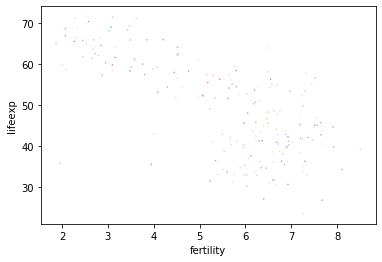

In [18]:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors # improving graphics by coloring countriesindividually, the lut parameter gives colors according to the number given
df6.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

(1, 9, 10, 90)

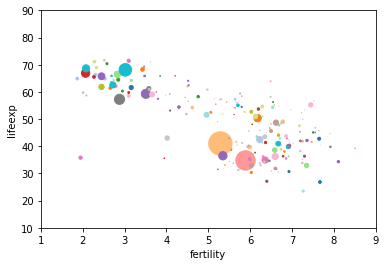

In [19]:
df6.plot.scatter('fertility', 'lifeexp', s=df6['population']*0.000001, c=cmap)
plt.axis((1,9,10,90))

### get to the cool animation
* after adjusting size by population, by scaling down millions of people by a factor of 1 mio (s.a.)
* automate the picture generation for the years from 1960 to 2015 and save them with the individual year in the name.

In [87]:
df_test = df3.unstack(1) # branches of at the end of step 8 in the 2.7 Long vs Wide exercise
df_test = df_test.iloc[:,160:164] # select the years 1960 to 2015 based on column index-number
df_test.shape

(667, 4)

In [51]:
cmap = plt.get_cmap('tab20', lut = len(temp)).colors # improving graphics by coloring countries individually, the lut parameter gives colors according to the number given


the following for-loop takes as input each of the columns given in the selected dataframe and performs the indiviudal operations done before, just on temporary files, that is select each column, unstack it on the index-level 1, generate the plot as detailed above. Then it is saved under with the year in its name given as placeholder '%s' in the appropriate folder.

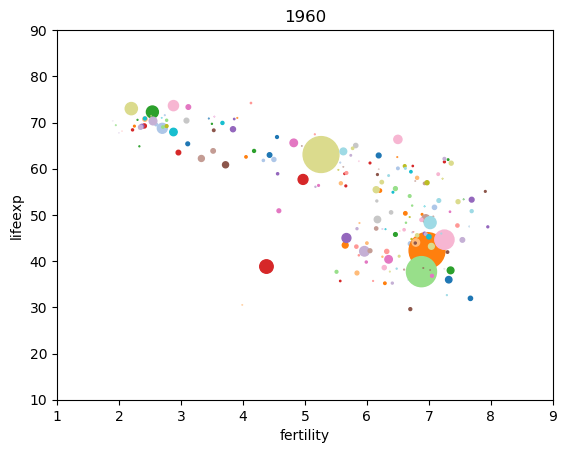

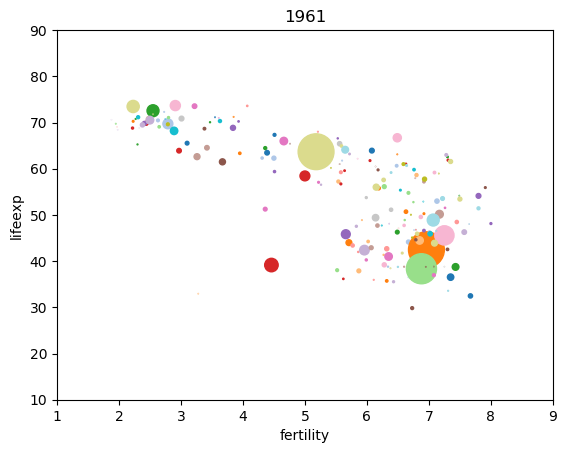

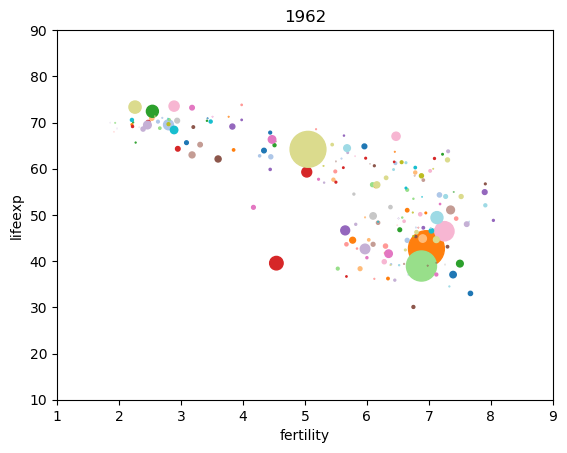

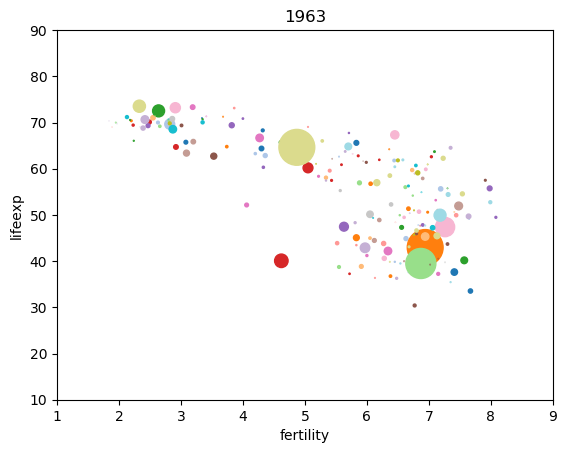

In [89]:
for i in df_test.columns:
    temp=df_test[i].unstack(1)
    temp.plot.scatter('fertility',  'lifeexp', s=temp2['population']*0.000001, c = cmap)
    plt.axis((1,9,10,90))
    plt.title(str(i))
    plt.savefig('2.7_yearly_population_blots_mk/lifeexp_%s.png' %i)

In [86]:
import imageio

images = []

for i in range(1960,2014):
    filename = '2.7_yearly_population_blots_mk/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=5)

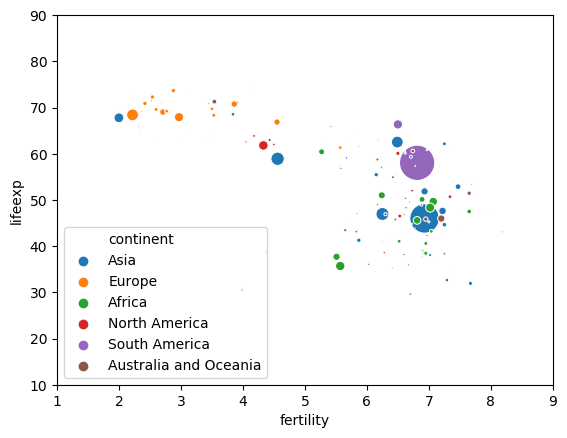

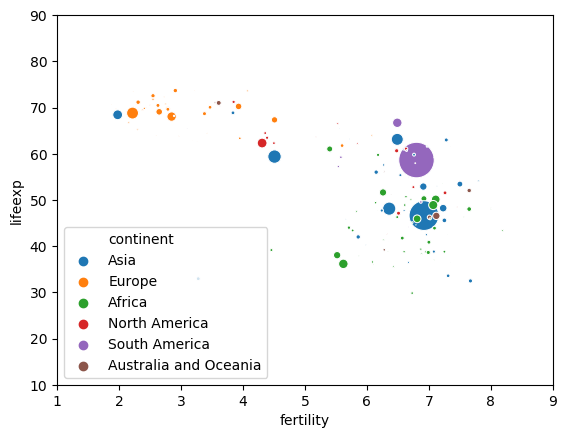

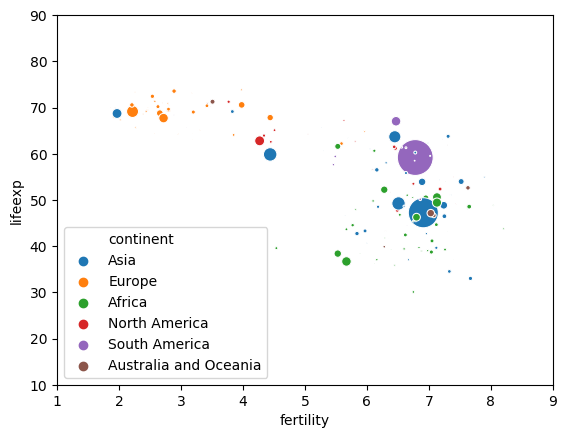

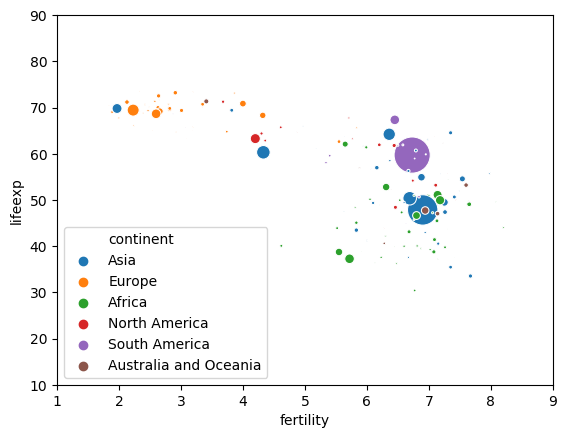

In [97]:
# this does produce weired legend artefacts
for i in df_test.columns:
    temp=df_test[i].unstack(1)
    temp.index.name = 'country'
    temp2 = pd.merge(temp, cont, right_on = ['country'] , left_on = ['country'], how = 'right').drop_duplicates()
    plt.figure(i)
    sns.scatterplot(data = temp2, x = 'fertility', y= 'lifeexp', s=temp2['population']*0.000001, hue = 'continent')
    plt.axis((1,9,10,90))
    plt.savefig('2.7_yearly_population_blots_mk/lifeexp_%s.png' %i)